# Project: Investigate a Dataset - TDP Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


#### Columns:
   Imdb_id         -  -               original_title
   cast                -  -              popularity
   director          -  -             production_companies
   release_year  -  -            revenue
   budget_adj     -  -           revenue_adj


### Question(s) for Analysis

##### Which acrtor achieve revenue in their movies
##### who the director has top successfull movies
##### production companies revenue vs budget (loss or gain)


#### import statements for all of the packages we need to run the project

In [3]:
# import statements for all of the packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as snb
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 3.2MB/s eta 0:00:01   33% |██████████▉                     | 3.5MB 28.7MB/s eta 0:00:01    47% |███████████████                 | 4.9MB 28.9MB/s eta 0:00:01    60% |███████████████████▎            | 6.3MB 29.4MB/s eta 0:00:01    73% |███████████████████████▌        | 7.7MB 30.0MB/s eta 0:00:01    99% |███████████████████████████████▊| 10.4MB 28.3MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 2.7MB/s eta 0:00:01   24% |███████▊                        | 3.2MB 27.3MB/s eta 0:00:01    62% |████████████████████            | 8.3MB 26.5MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: pandas 0.23.3
    Uninstalling pandas-0.23.3:
      Successfully uninstalled pandas-0.23.3


<a id='wrangling'></a>
## Data Wrangling



### General Properties


Load data from  tmdb-movies.csv file

In [4]:
df= pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Check the statistics for the data frame

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Check the number of columns and rows for the dataframe

In [6]:
# Check the number of columns and rows for the dataframe
df.shape

(10866, 21)

Get the number of NA/Null values for each feature

In [7]:
# Get the number of NA/Null values for each feature
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64


### Data Cleaning

#### Which data to be droped

For the questions about cast and director, it will be necessary to drop the rows has NA values.
Production_companies will droped in the question number 3.

#### which data to be filled
The production companies missing data will be filled with "Other companies" value

####Columns to be droped
The columns home page, tagline and keywords NA values will be dropped because it is not inculded in the calculations
 

In [8]:
''' Drop the cast and directors NA values from 
the dataframe to calculate the average revenue and top rated movies
'''
df.dropna(subset=['cast','director'], how='any',inplace=True)

In [11]:
df.drop(['homepage','tagline','keywords'],axis=1, inplace=True)

Check features after drop the NA

In [12]:
# Check features after drop the NA
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10752 entries, 0 to 10865
Data columns (total 18 columns):
id                      10752 non-null int64
imdb_id                 10746 non-null object
popularity              10752 non-null float64
budget                  10752 non-null int64
revenue                 10752 non-null int64
original_title          10752 non-null object
cast                    10752 non-null object
director                10752 non-null object
overview                10749 non-null object
runtime                 10752 non-null int64
genres                  10732 non-null object
production_companies    9780 non-null object
release_date            10752 non-null object
vote_count              10752 non-null int64
vote_average            10752 non-null float64
release_year            10752 non-null int64
budget_adj              10752 non-null float64
revenue_adj             10752 non-null float64
dtypes: float64(4), int64(6), object(8)
memory usage: 1.9+ MB


In [19]:
df.drop_duplicates()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,MainActor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08,Leonardo DiCaprio
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08,Arnold Schwarzenegger
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08,Matt Damon
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09,Sandra Bullock
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08,Amy Poehler


In [20]:
df.isnull().sum()

id                        0
imdb_id                   6
popularity                0
budget                    0
revenue                   0
original_title            0
cast                      0
director                  0
overview                  3
runtime                   0
genres                   20
production_companies    972
release_date              0
vote_count                0
vote_average              0
release_year              0
budget_adj                0
revenue_adj               0
MainActor                 0
dtype: int64

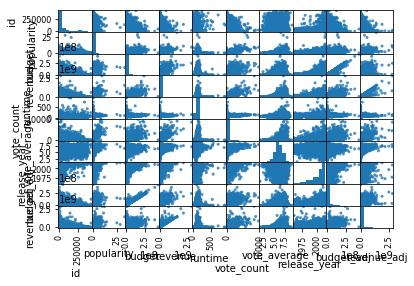

In [37]:
pd.plotting.scatter_matrix(df, alpha=0.8);

Add new column Main Actor by applying lamda function to split the cast cell by | and get the first one

In [21]:
# Add column Main Actor/Actress by applying lamda function to split the cast cell by | and get the first one
df['MainActor']= df['cast'].apply(lambda x: x.split('|')[0])
# another way to get the Main actor df['MainActor']=[ act.split('|')[0] for act in df['cast'] ]


In [15]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,MainActor
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Chris Pratt
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Tom Hardy
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Shailene Woodley
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Harrison Ford
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Vin Diesel


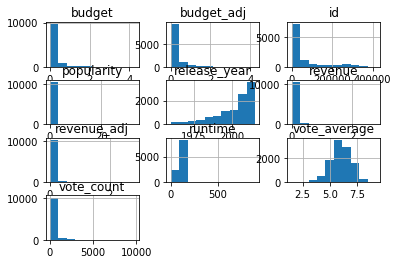

In [27]:
df.hist();

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (top acrtors achieved revenue in their movies)

group by Main actor and sum the revenue per actor.

In [22]:
#group by Main actor and sum the revenue per actor.
top_actors = df.groupby('MainActor')['revenue'].sum().sort_values(ascending=False)

Get Top 5 actors

In [23]:
top_actors =top_actors.head(5)

Present the 5 actors with top revenues

Text(0,0.5,'Revenue')

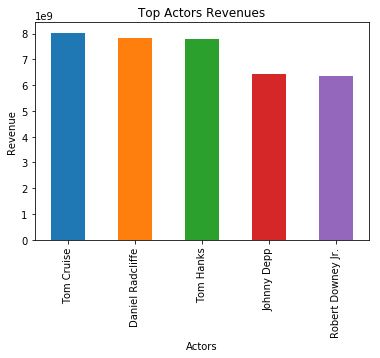

In [24]:
top_actors.plot(kind='bar',title="Top Actors Revenues", label='Actor');
plt.xlabel("Actors")
plt.ylabel('Revenue')


The above chart, shows that, Tom cruise has the most successfull movies based on revenues

### Research Question 2 (who the director has top rated movies)

group by directors to get the average of the vote average column for all movies directed by them.

In [15]:
# group by directors to get the average of the vote average column for all movies directed by them.

top_five_directors=df.groupby('director')['vote_average'].mean().sort_values(ascending=False).head(5)

Present the directors have top rated movies

Text(0,0.5,'Total Average Rate')

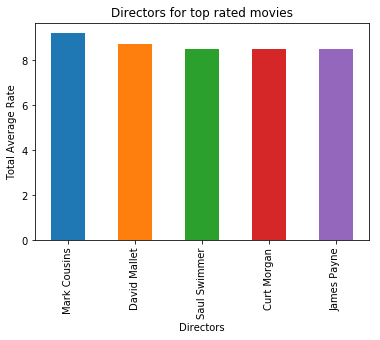

In [16]:
top_five_directors.plot(kind='bar',title="Directors for top rated movies", label='Director');
plt.xlabel("Directors")
plt.ylabel('Total Average Rate')


The chart above shows that the top rated movies has directed by Mark Cousins

### Extra Step
Comparing between the actors and directors for the top rated movies

In [17]:
top_five_actors=df.groupby('MainActor')['vote_average'].mean().sort_values(ascending=False).head(5)

the below chart view the relation between top rated movies for actors vs top rated movies for directors, if the blue and orange are the same hight , then both director and actor the cause to succuss this movie

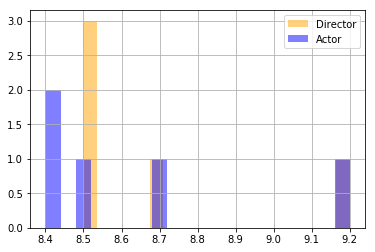

In [18]:
top_five_directors.hist(alpha=0.5, bins=20, color='orange' ,label='Director');
top_five_actors.hist(alpha=0.5, bins=20, color='blue' ,label='Actor');
plt.legend();


The chart above shows the relations between famouse actor and director, how can affect the popularity of a good movie

### Question 3 (production companies revenue vs budget (loss or gain))

this question show the relation between budjet and revenue for production companies, is the companies gaining profit or lose

In [19]:
def fillNAWithValue(df,colName,ValueToFill):
    '''
    This function to fill the Na values  in column
    with specific word
    args: 
        df : the dataframe
        colName: the column name will be filled
        ValueToFill: the value will be used to fill the NA
    '''
    df[colName].fillna(ValueToFill, inplace=True)
    

fill the NA in production companies to be Other companies

In [20]:
#Fill NA with Other word
fillNAWithValue(df,'production_companies','Other')

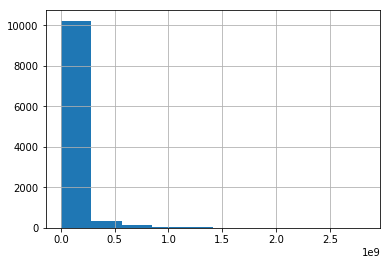

In [28]:
df['revenue_adj'].hist();

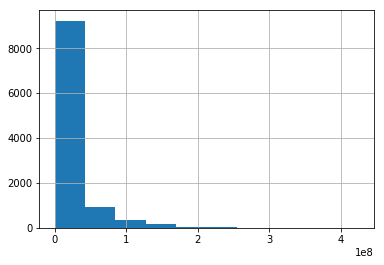

In [29]:
df['budget_adj'].hist();

Both Budget and Revenue are right skewed, so if the budget increased the propability of the revenue increase

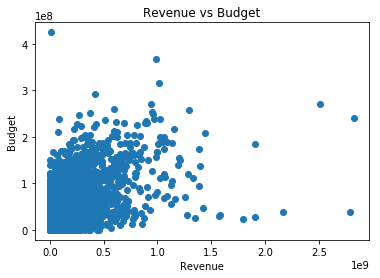

In [25]:
plt.scatter(data = df, x = 'revenue_adj', y = 'budget_adj');
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title("Revenue vs Budget");

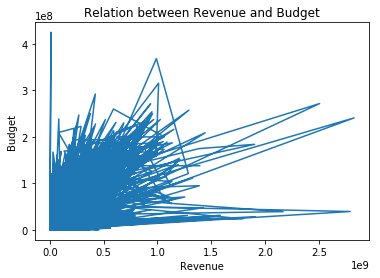

In [34]:
plt.plot(df['revenue_adj'], df['budget_adj'])
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.title('Relation between Revenue and Budget')
plt.show()

Revenue vs budget are skeweed to the right, that means few companies are having most of the profits from the movies production

<a id='conclusions'></a>
## Conclusions

Last, after reviewing the movies and the revenue, we got the below:

The data sample contains data for movies with cast, production movies, titles, revenue, and budget.

In this explatory, I choose to check the success of movies based on rate and revenue, to check which actor or director has the most successfull movies.

Also checked the companies revenues, and the relation between how much they spend in production and the revenue.

findings:

1- popular actor and good director may be great factor to increase the revenue and get numerous positive ratings.
2- few companies in the movies prodcution gaining most of the revenue, but they have huge budgets.





# Limitations

We can't get the revenue per company, because there alot of companies unions in the movies production.




## Submitting your Project 



In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0